<a href="https://colab.research.google.com/github/Niko1909/PyTorch-Tutorial/blob/main/torch_tutorial_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
type(X)

numpy.ndarray

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


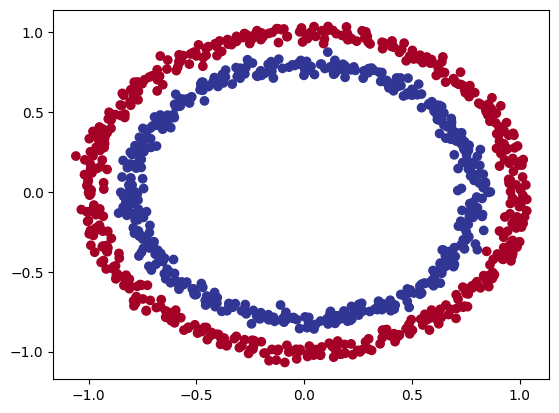

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch
from torch import nn
torch.__version__

'2.4.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 5)
    self.layer2 = nn.Linear(5, 1)


  def forward(self, x):
    return self.layer2(self.layer1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5987,  0.5431],
                      [-0.7068, -0.0586],
                      [-0.2232,  0.4927],
                      [ 0.4792, -0.6856],
                      [ 0.1483,  0.3639]])),
             ('layer1.bias',
              tensor([-0.3258, -0.1323,  0.3070, -0.5049, -0.0017])),
             ('layer2.weight',
              tensor([[-0.3253,  0.3496, -0.2285,  0.2987,  0.0620]])),
             ('layer2.bias', tensor([-0.2749]))])

In [ ]:
with torch.no_grad():
  untrained_preds = model_0(X_test.to(device))
print(untrained_preds[:10], y_test[:10])

tensor([[-0.8288],
        [-0.9063],
        [-0.3876],
        [-0.9548],
        [-0.0096],
        [-0.0598],
        [-0.5776],
        [-0.3784],
        [-0.4042],
        [-0.9073]]) tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# loss_fn = nn.BCELoss() # requires inputs to have gone through a sigmoid before this
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation fn built in, more numerically stable
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
torch.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  logits = model_0(X_train).squeeze()
  preds = torch.round(torch.sigmoid(logits))

  loss = loss_fn(logits, y_train)
  acc = accuracy_fn(y_train, preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.no_grad():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_preds, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc:.2f}% | Test loss: {test_loss} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.7311936020851135 | Accuracy: 41.00% | Test loss: 0.7365551590919495 | Test accuracy: 43.00%
Epoch: 10 | Loss: 0.7118274569511414 | Accuracy: 45.38% | Test loss: 0.7240695357322693 | Test accuracy: 48.50%
Epoch: 20 | Loss: 0.7032448053359985 | Accuracy: 46.38% | Test loss: 0.7224775552749634 | Test accuracy: 50.50%
Epoch: 30 | Loss: 0.6991669535636902 | Accuracy: 47.62% | Test loss: 0.7327850461006165 | Test accuracy: 50.00%
Epoch: 40 | Loss: 0.6970790028572083 | Accuracy: 47.62% | Test loss: 0.7282878756523132 | Test accuracy: 51.50%
Epoch: 50 | Loss: 0.6959188580513 | Accuracy: 48.62% | Test loss: 0.7399919033050537 | Test accuracy: 50.00%
Epoch: 60 | Loss: 0.6952176690101624 | Accuracy: 48.38% | Test loss: 0.727394163608551 | Test accuracy: 53.00%
Epoch: 70 | Loss: 0.6947588324546814 | Accuracy: 49.00% | Test loss: 0.7266959547996521 | Test accuracy: 53.50%
Epoch: 80 | Loss: 0.6944376230239868 | Accuracy: 48.88% | Test loss: 0.7328969836235046 | Test accuracy: 52.5

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

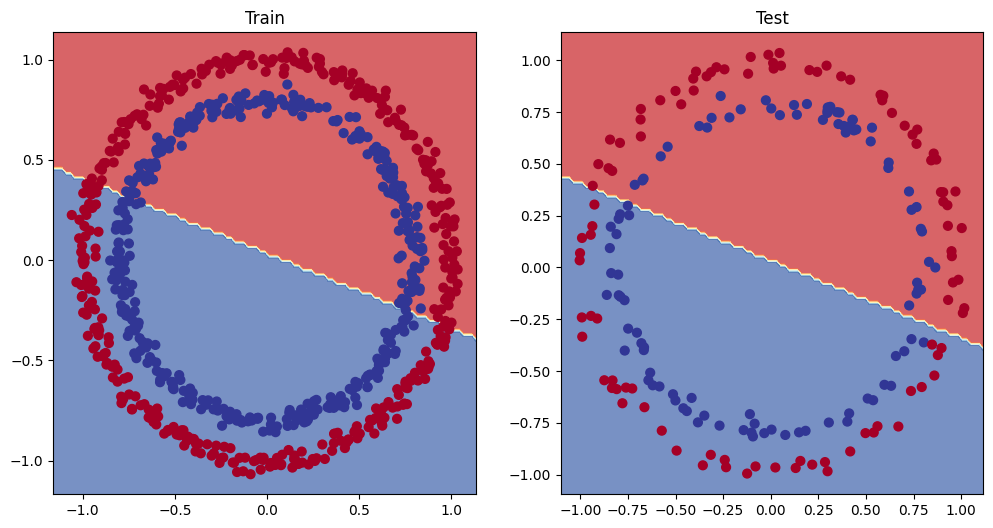

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2, 10)
    self.layer_2 = nn.Linear(10,10)
    # self.layer_3 = nn.Linear(10, 20)
    # self.layer_4 = nn.Linear(20, 10)
    self.layer_3 = nn.Linear(10,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.Adam(model_3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss works with raw logits as it has sigmoid built into it
  acc = accuracy_fn(y_train, y_preds)

  optimizer1.zero_grad()
  loss.backward()
  optimizer1.step()

  with torch.no_grad():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69394, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.00168, Accuracy: 100.00% | Test Loss: 0.00744, Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.00071, Accuracy: 100.00% | Test Loss: 0.00543, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00041, Accuracy: 100.00% | Test Loss: 0.00493, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00026, Accuracy: 100.00% | Test Loss: 0.00573, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00018, Accuracy: 100.00% | Test Loss: 0.00516, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00013, Accuracy: 100.00% | Test Loss: 0.00513, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00010, Accuracy: 100.00% | Test Loss: 0.00534, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00008, Accuracy: 100.00% | Test Loss: 0.00560, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00007, Accuracy: 100.00% | Test Loss: 0.00577, Test Accuracy: 100.00%


In [ ]:
with torch.no_grad():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

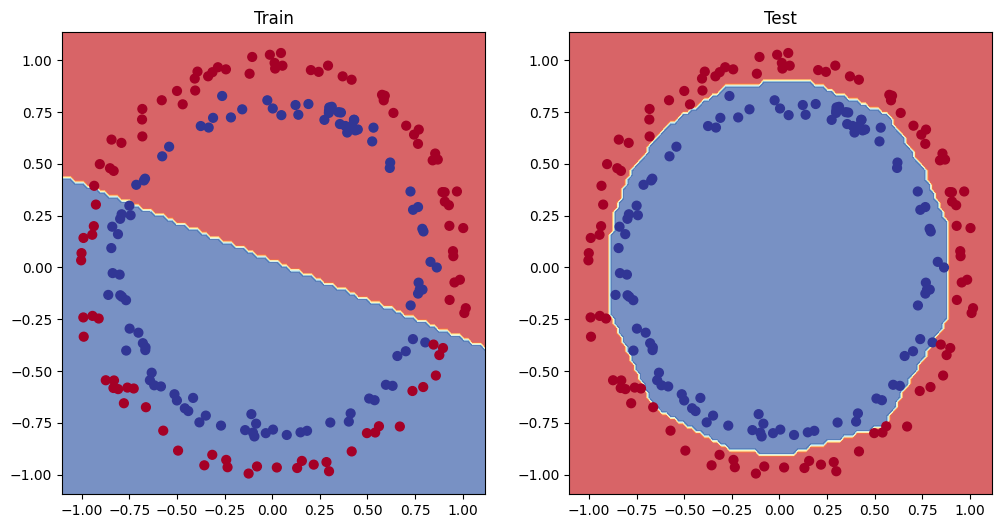

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_test, y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

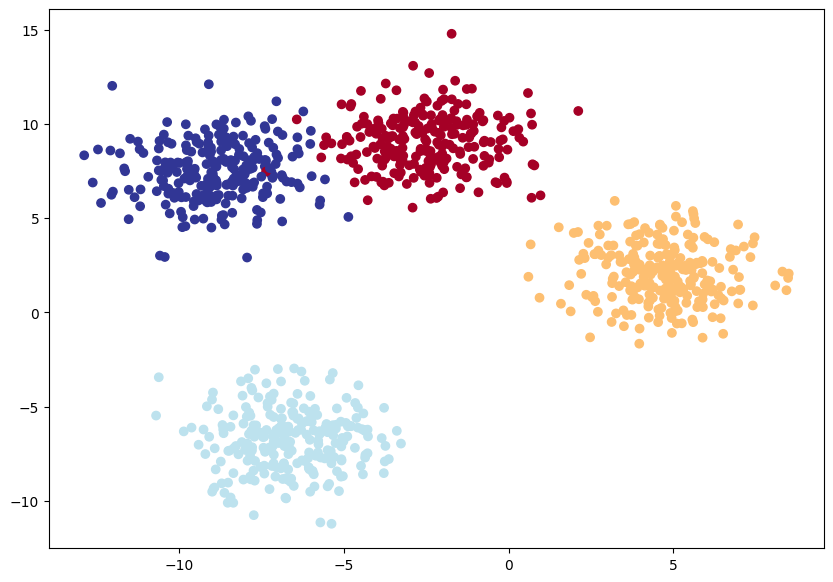

In [ ]:
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [ ]:
y_logits = model_4(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])
print(torch.argmax(y_pred_probs[:5], dim=1))

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)
tensor([3, 3, 2, 1, 3])


In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  y_logits = model_4(X_blob_train)
  y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    test_logits = model_4(X_blob_test)
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [ ]:
with torch.no_grad():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


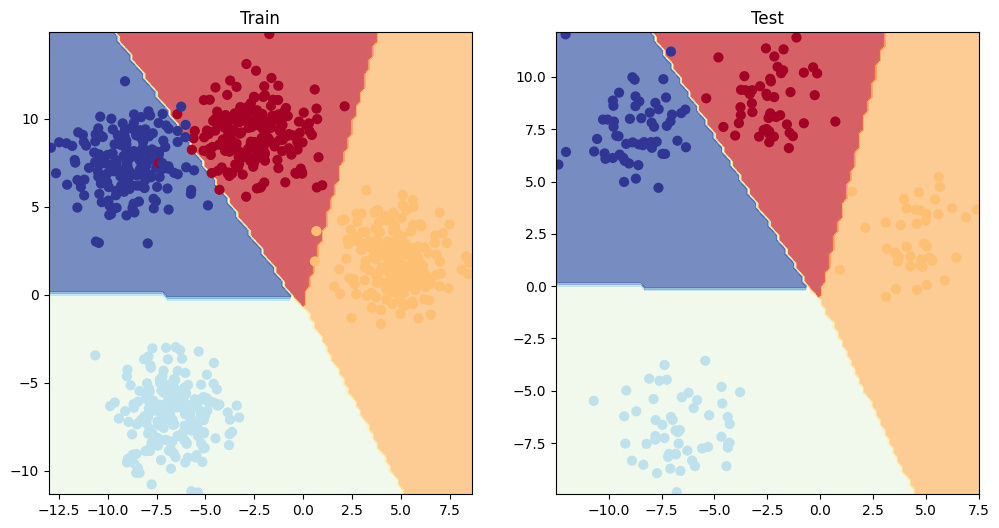

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
try:
    from torchmetrics import Accuracy, Precision, Recall
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy, Precision, Recall

tensor(0.9950)

In [ ]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)

In [ ]:
torchmetrics_precision = Precision(task='multiclass', num_classes=4, average=None).to(device) # P = TP / TP + FP
torchmetrics_precision(y_preds, y_blob_test) # precision of 0.98 for red (has a false positive)

tensor([0.9800, 1.0000, 1.0000, 1.0000])

In [ ]:
torchmetrics_recall = Recall(task='multiclass', num_classes=4, average=None).to(device) # R = TP / TP + FN
torchmetrics_recall(y_preds, y_blob_test) # recall of 0.9825 for blue (has a false negative)

tensor([1.0000, 1.0000, 1.0000, 0.9825])

# Exercise


In [ ]:
from sklearn.datasets import make_moons

device = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_SEED = 42

X, y = make_moons(n_samples=1000, random_state=RANDOM_SEED)

X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.0087,  0.3682],
         [ 0.9214, -0.4969],
         [ 0.9402, -0.4982],
         [ 0.4659, -0.3454],
         [-0.8504,  0.5261]]),
 tensor([1., 1., 1., 1., 0.]))

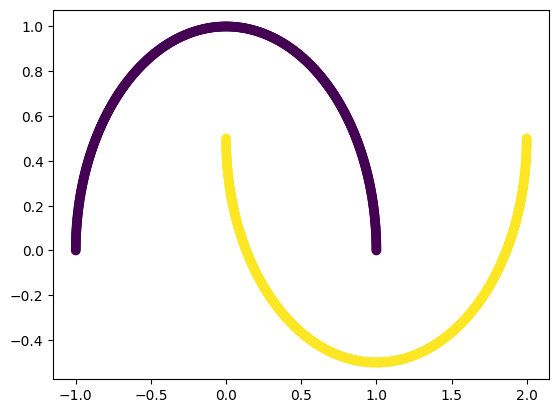

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
class MoonClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2, 10)
    self.layer_2 = nn.Linear(10, 10)
    self.layer_3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

moon_model = MoonClassifier()
moon_model

MoonClassifier(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(moon_model.parameters(), lr=0.1)

In [ ]:
def my_accuracy(preds, targets):
  correct = torch.sum(torch.eq(preds, targets)).item()
  return (correct/len(targets))*100

In [ ]:
X_train_moon, X_test_moon = X_train_moon.to(device), X_test_moon.to(device)
y_train_moon, y_test_moon = y_train_moon.to(device), y_test_moon.to(device)

epochs = 100
for epoch in range(epochs):
  moon_model.train()
  y_logits = moon_model(X_train_moon).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train_moon)
  acc = my_accuracy(y_pred, y_train_moon)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  moon_model.eval()
  with torch.no_grad():
    test_logits = moon_model(X_test_moon).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test_moon)
    test_acc = my_accuracy(test_pred, y_test_moon)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.53817, Accuracy: 81.12% | Test Loss: 0.43505, Test Accuracy: 78.00000%
Epoch: 10 | Loss: 0.09034, Accuracy: 95.25% | Test Loss: 0.06155, Test Accuracy: 97.00000%
Epoch: 20 | Loss: 0.00903, Accuracy: 100.00% | Test Loss: 0.00755, Test Accuracy: 100.00000%
Epoch: 30 | Loss: 0.00069, Accuracy: 100.00% | Test Loss: 0.00043, Test Accuracy: 100.00000%
Epoch: 40 | Loss: 0.00009, Accuracy: 100.00% | Test Loss: 0.00007, Test Accuracy: 100.00000%
Epoch: 50 | Loss: 0.00003, Accuracy: 100.00% | Test Loss: 0.00002, Test Accuracy: 100.00000%
Epoch: 60 | Loss: 0.00002, Accuracy: 100.00% | Test Loss: 0.00001, Test Accuracy: 100.00000%
Epoch: 70 | Loss: 0.00001, Accuracy: 100.00% | Test Loss: 0.00001, Test Accuracy: 100.00000%
Epoch: 80 | Loss: 0.00001, Accuracy: 100.00% | Test Loss: 0.00001, Test Accuracy: 100.00000%
Epoch: 90 | Loss: 0.00001, Accuracy: 100.00% | Test Loss: 0.00001, Test Accuracy: 100.00000%


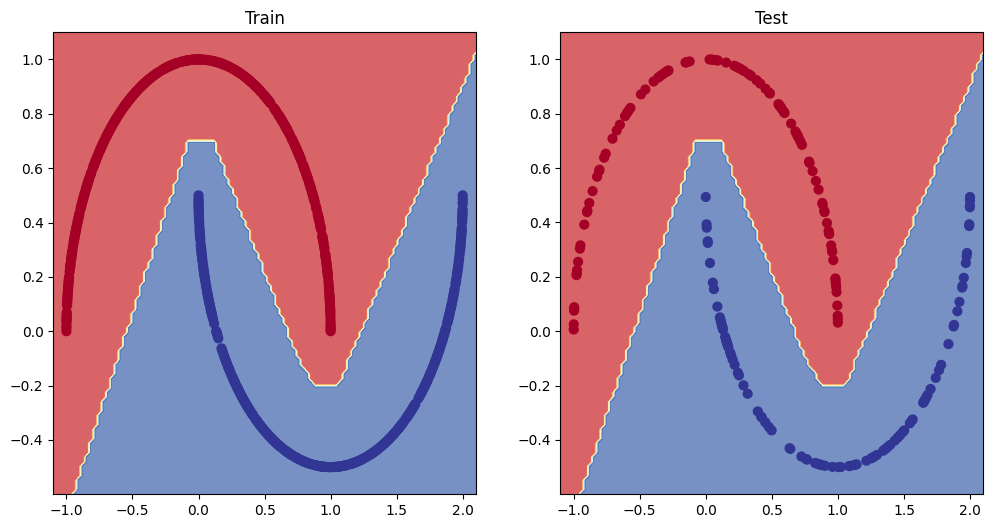

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, X_train_moon, y_train_moon)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, X_test_moon, y_test_moon)

In [ ]:
import numpy as np
def tanh(x):
  num = np.exp(x) - np.exp(-x)
  den = np.exp(x) + np.exp(-x)
  return num/den

In [ ]:
tanh(1)

0.7615941559557649

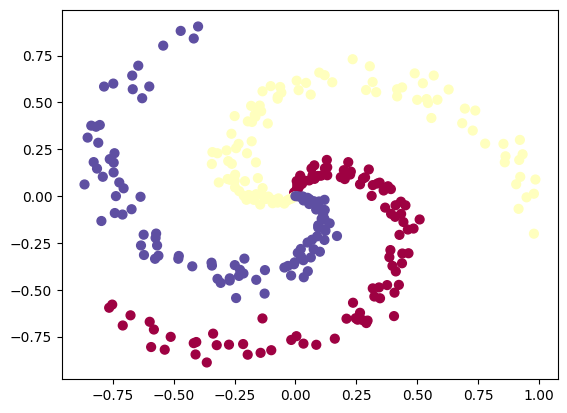

In [ ]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train_spiral, X_test_spiral, y_train_spiral, y_test_spiral = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2, 10)
    self.layer_2 = nn.Linear(10, 10)
    self.layer_3 = nn.Linear(10, 3) # 3 is num classes
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

spiral_model = SpiralModel()
spiral_model

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(spiral_model.parameters(), lr=0.1)

In [ ]:
X_train_spiral, X_test_spiral = X_train_spiral.to(device), X_test_spiral.to(device)
y_train_spiral, y_test_spiral = y_train_spiral.to(device), y_test_spiral.to(device)

epochs = 100
for epoch in range(epochs):
  spiral_model.train()
  y_logits = spiral_model(X_train_spiral)
  y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

  loss = loss_fn(y_logits, y_train_spiral) # for binary classification, y_train has to be float, for multi classification, y_train has to be LongTensor
  acc = my_accuracy(y_preds, y_train_spiral)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  spiral_model.eval()
  with torch.no_grad():
    test_logits = spiral_model(X_test_spiral)
    test_preds = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    test_loss = loss_fn(test_logits, y_test_spiral)
    test_acc = my_accuracy(test_preds, y_test_spiral)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.5f}%")

Epoch: 0 | Loss: 1.09456, Accuracy: 34.58% | Test Loss: 1.03192, Test Accuracy: 56.66667%
Epoch: 10 | Loss: 0.61384, Accuracy: 70.42% | Test Loss: 0.58766, Test Accuracy: 60.00000%
Epoch: 20 | Loss: 0.29993, Accuracy: 92.08% | Test Loss: 0.27863, Test Accuracy: 95.00000%
Epoch: 30 | Loss: 0.14770, Accuracy: 95.00% | Test Loss: 0.09976, Test Accuracy: 98.33333%
Epoch: 40 | Loss: 0.08138, Accuracy: 97.50% | Test Loss: 0.04066, Test Accuracy: 100.00000%
Epoch: 50 | Loss: 0.04672, Accuracy: 99.17% | Test Loss: 0.01791, Test Accuracy: 100.00000%
Epoch: 60 | Loss: 0.03324, Accuracy: 99.17% | Test Loss: 0.00957, Test Accuracy: 100.00000%
Epoch: 70 | Loss: 0.02853, Accuracy: 99.17% | Test Loss: 0.00663, Test Accuracy: 100.00000%
Epoch: 80 | Loss: 0.02601, Accuracy: 99.17% | Test Loss: 0.00460, Test Accuracy: 100.00000%
Epoch: 90 | Loss: 0.02424, Accuracy: 99.17% | Test Loss: 0.00337, Test Accuracy: 100.00000%


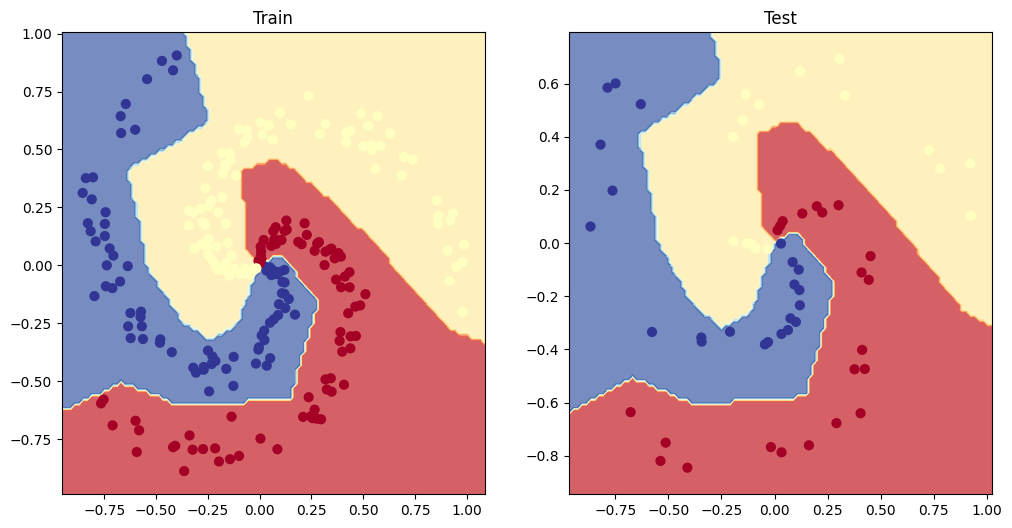

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(spiral_model, X_train_spiral, y_train_spiral)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(spiral_model, X_test_spiral, y_test_spiral)